# 브로드캐스팅 예제

## 브로드캐스팅 예제

In [3]:
import numpy as np
import pandas as pd

In [4]:
M=np.ones((2,3))
a=np.arange(3)

print(M) # (2,3)
print(a) # (3,) => (1,3) => (2,3)
M+a 

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]


array([[1., 2., 3.],
       [1., 2., 3.]])

## 브로드캐스팅 예제

In [5]:
a = np.arange(3).reshape((3,1))
b = np.arange(3) 

a #(3,1) ==> (3,3) 
b #(3,) => (1,3)==>(3,3)
a+b # 

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## 센터링 예제

In [6]:
#아래의 10*3 배열을 브로드캐스팅을 이용하여 centering 하세요
#X.mean(0)은 첫번째 차원의 특성별 평균
X=np.random.random((10,3))

In [7]:
X-X.mean(0)

array([[ 0.3667561 , -0.22389266,  0.22104195],
       [-0.29219069, -0.16882187, -0.43258242],
       [ 0.29399435, -0.28882072, -0.21000395],
       [ 0.39326058,  0.35744639, -0.31254565],
       [-0.09686776,  0.02748562, -0.03317696],
       [ 0.11819568, -0.10798986,  0.24514516],
       [ 0.25582696,  0.0155916 , -0.00503584],
       [ 0.0072942 ,  0.10705609,  0.26663738],
       [-0.52208412,  0.4345161 ,  0.06579259],
       [-0.52418531, -0.1525707 ,  0.19472773]])

# 연습문제

## Seattle 강수량

In [11]:
# 다음은 Seattle 2014년 강수량 데이터이다. 물음에 답하시오
csv_path = 'http://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/Seattle2014.csv'
rainfall = pd.read_csv(csv_path)['PRCP'].values
inches = rainfall / 254

#1. 비가오지 않은 날은 총 몇일인가?
np.sum(inches==0)
#2. 비가 온 날은 총 몇일인가?
np.sum(inches>0)
#3. 0.5 인치보다 크고, 1인치보다 작은 강수량은 총 몇일인가?
np.sum((inches > 0.5) & (inches <1))

29

In [12]:
rainy = (inches > 0)
summer = ((np.arange(365) -172 < 90)) & ((np.arange(365) -172) > 0)
# 비가 온 날의 강수량 평균?
np.mean(inches[rainy])
# 여름 강수량의 평균은?
np.mean(inches[summer])
# 여름에 최대 강수량은?
np.max(inches[summer])
#여름이외의 계절에 비가 온날의 강수량 평균은?
np.mean(inches[~summer & rainy])

0.3356009726725335

## 2차원 함수 플로팅

In [14]:
import numpy as np

# 2차원 함수 플로팅하기

x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:,np.newaxis]
z=np.sin(x)**10+np.cos(10+y*x)*np.cos(x)
print(x.shape, y.shape, (x*y).shape, z.shape)

(50,) (50, 1) (50, 50) (50, 50)


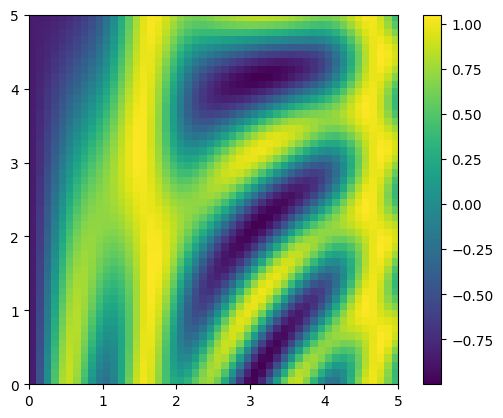

In [15]:
import matplotlib.pyplot as plt
plt.imshow(z, extent=[0,5,0,5], cmap='viridis')
plt.colorbar()

## 히스토그램

다음 데이터에 대해서 아래 조건을 활용하여 히스토그램을 그려 보시오 

* np.searchsorted 함수를 활용
* np.add.at 함수를 활용
* bins를 -5~5사이로 50칸 만든 다음에 
* x가 위의 bins 중에서 어느 칸에 속하는지 파악을 하고 
* 해당하는 칸에 몇개가 있는지 np.add.at을 이용하여 카운트한다.

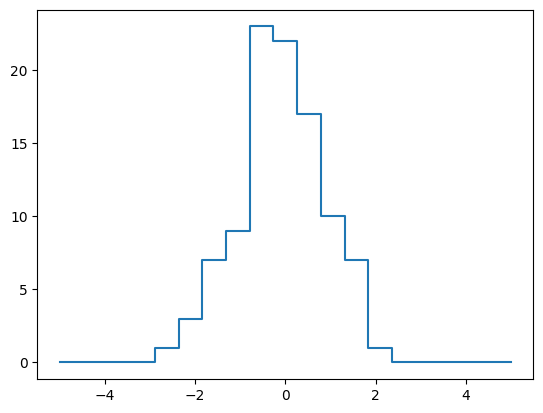

In [4]:
import matplotlib.pyplot as plt

np.random.seed(42)
x=np.random.randn(100)
bins=np.linspace(-5,5,20)
counts=np.zeros_like(bins)
i=np.searchsorted(bins,x)
np.add.at(counts,i,1)
plt.plot(bins,counts,linestyle='-', drawstyle='steps')

## K 최근접 이웃 알고리즘

In [9]:
import numpy as np
rand=np.random.RandomState(42)
X= rand.rand(10,2)

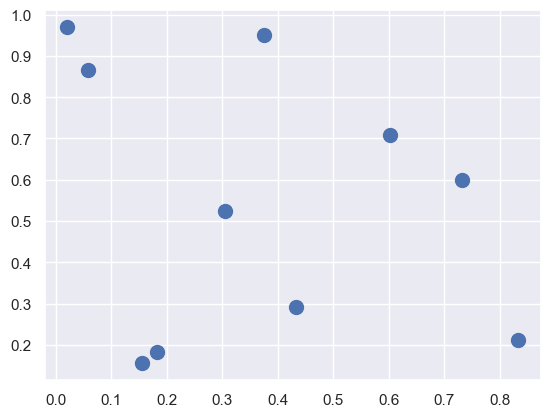

In [10]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
plt.scatter(X[:,0], X[:,1], s=100)

In [11]:
x1=X[:,np.newaxis,:]
x2=X[np.newaxis,:,:]
difference = x1-x2

In [90]:
x1.shape

(10, 1, 2)

In [91]:
x2.shape

(1, 10, 2)

In [80]:
print(x1[0], x1[0][0][0], x1[0][0][1])

[[0.37454012 0.95071431]] 0.3745401188473625 0.9507143064099162


In [81]:
print(x1[1], x1[1][0][0], x1[1][0][1])

[[0.73199394 0.59865848]] 0.7319939418114051 0.5986584841970366


In [88]:
print(x2[0], x2[0][0][0], x2[0][0][1])

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]
 [0.02058449 0.96990985]
 [0.83244264 0.21233911]
 [0.18182497 0.18340451]
 [0.30424224 0.52475643]
 [0.43194502 0.29122914]] 0.3745401188473625 0.9507143064099162


In [89]:
print(x2[0], x2[0][1][0], x2[0][1][1])

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]
 [0.02058449 0.96990985]
 [0.83244264 0.21233911]
 [0.18182497 0.18340451]
 [0.30424224 0.52475643]
 [0.43194502 0.29122914]] 0.7319939418114051 0.5986584841970366


In [25]:
difference

array([[[ 0.        ,  0.        ],
        [-0.35745382,  0.35205582],
        [ 0.21852148,  0.79471979],
        [ 0.31645651,  0.08453816],
        [-0.22657489,  0.24264173],
        [ 0.35395562, -0.01919555],
        [-0.45790252,  0.7383752 ],
        [ 0.19271515,  0.7673098 ],
        [ 0.07029788,  0.42595787],
        [-0.0574049 ,  0.65948517]],

       [[ 0.35745382, -0.35205582],
        [ 0.        ,  0.        ],
        [ 0.5759753 ,  0.44266396],
        [ 0.67391033, -0.26751766],
        [ 0.13087893, -0.10941409],
        [ 0.71140945, -0.37125137],
        [-0.1004487 ,  0.38631937],
        [ 0.55016897,  0.41525397],
        [ 0.4277517 ,  0.07390205],
        [ 0.30004892,  0.30742934]],

       [[-0.21852148, -0.79471979],
        [-0.5759753 , -0.44266396],
        [ 0.        ,  0.        ],
        [ 0.09793503, -0.71018163],
        [-0.44509637, -0.55207806],
        [ 0.13543415, -0.81391533],
        [-0.676424  , -0.05634459],
        [-0.02580633, -0

In [23]:
x2[0]

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914]])

In [14]:
difference

array([[[ 0.        ,  0.        ],
        [-0.35745382,  0.35205582],
        [ 0.21852148,  0.79471979],
        [ 0.31645651,  0.08453816],
        [-0.22657489,  0.24264173],
        [ 0.35395562, -0.01919555],
        [-0.45790252,  0.7383752 ],
        [ 0.19271515,  0.7673098 ],
        [ 0.07029788,  0.42595787],
        [-0.0574049 ,  0.65948517]],

       [[ 0.35745382, -0.35205582],
        [ 0.        ,  0.        ],
        [ 0.5759753 ,  0.44266396],
        [ 0.67391033, -0.26751766],
        [ 0.13087893, -0.10941409],
        [ 0.71140945, -0.37125137],
        [-0.1004487 ,  0.38631937],
        [ 0.55016897,  0.41525397],
        [ 0.4277517 ,  0.07390205],
        [ 0.30004892,  0.30742934]],

       [[-0.21852148, -0.79471979],
        [-0.5759753 , -0.44266396],
        [ 0.        ,  0.        ],
        [ 0.09793503, -0.71018163],
        [-0.44509637, -0.55207806],
        [ 0.13543415, -0.81391533],
        [-0.676424  , -0.05634459],
        [-0.02580633, -0

In [38]:
a=np.array([1,2,3])

In [47]:
b=np.array([0,0,0])

In [48]:
newa = a[:,np.newaxis]

In [49]:
newb = b[np.newaxis,:]

In [50]:
newa-newb

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [52]:
newa-newb

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])